In [2]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt


import seaborn as sns
sns.set(font_scale=1.5)
import scikitplot as skplt
import pydotplus


from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))


from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor  

import warnings
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from sklearn.tree import export_graphviz


plt.rc("figure", figsize=(9, 7))

warnings.simplefilter('ignore')

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

pd.set_option('display.max_columns', 500)   # to display 500 columns
pd.set_option('display.max_rows', 500)      # to display 500 rows

import time
from datetime import datetime

from sklearn.svm import SVC

import joblib
import pickle

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

### Uploading X_train, X_test, y_train, y_test to run the models

In [3]:
X_train_pca = pd.read_csv('X_train.csv') #, header=False, inferSchema=True)

#X_train_pca = pd.read_csv('X_train_pca.csv') #, header=False, inferSchema=True)
del X_train_pca['Unnamed: 0']

print(X_train_pca.shape)
X_train_pca.head(2)

(567470, 45)


,BENE_SEX_IDENT_CD,BENE_RACE_CD,END_STAGE_RENAL2008,END_STAGE_RENAL2009,SP_ALZHDMTA2008,SP_ALZHDMTA2009,SP_CHF2008,SP_CHF2009,SP_CHRNKIDN2008,SP_CHRNKIDN2009,SP_CNCR2008,SP_CNCR2009,SP_COPD2008,SP_COPD2009,SP_DEPRESSN2008,SP_DEPRESSN2009,SP_DIABETES2008,SP_DIABETES2009,SP_ISCHMCHT2008,SP_ISCHMCHT2009,SP_OSTEOPRS2008,SP_OSTEOPRS2009,SP_RA_OA2008,SP_RA_OA2009,SP_STRKETIA2008,TOTAL_DIAGNOSIS2008,TOTAL_DIAGNOSIS2009,TOTAL_PAYMENT2008,TOTAL_PAYMENT2009,CHANGE_IN_PAYMEMT,CHANGE_IN_DIAGNOSIS,AGE,LOS,NUM_INPT_ADM,TOTAL_INPT_COST,TOTAL_INPT_DIAGNOSIS,TOTAL_INPT_PROCS,NUM_OPD_VISIT,TOTAL_OPD_COST,TOTAL_OPD_DIAGNOSIS,TOTAL_OPD_PROCS,TOTAL_OPD_HCPCS,TOTAL_QTY_DSPNSD_NUM,PTNT_PAY_RX_AMT,TOT_RX_CST_AMT
0,0.894013,-0.376112,-0.276447,-0.324129,0.488824,0.548117,0.631811,0.722251,0.438255,-1.957371,0.259995,0.297347,0.396833,0.432235,0.52114,0.570588,-1.278217,0.844847,0.851854,-1.047279,0.459553,-2.047699,0.426502,0.459052,0.217322,-0.500202,0.167999,-0.373756,-0.438020,-0.004502,0.964159,-2.688845,-0.402922,-0.526411,-0.435816,-0.512382,-0.389891,-0.231241,-0.176626,-0.399277,-0.033666,-0.354668,-0.755605,-0.712789,-0.643576
1,0.894013,-0.376112,-0.276447,-0.324129,0.488824,-1.824429,0.631811,-1.384560,0.438255,0.510889,-3.846233,-3.363078,0.396833,-2.313555,0.52114,0.570588,-1.278217,-1.183646,-1.173910,-1.047279,0.459553,-2.047699,0.426502,0.459052,-4.601474,0.723995,1.757393,0.362291,0.092998,-0.268787,1.548998,0.424751,-0.402922,-0.526411,-0.435816,-0.512382,-0.389891,-0.598411,-0.284830,-0.443283,-0.033666,-0.438605,-0.727146,-0.617502,-0.653561


In [4]:
y_train = pd.read_csv('y_train.csv') #, header=False, inferSchema=True)
del y_train['Unnamed: 0']

print(y_train.shape)
y_train.head(2)

(567470, 1)


,READMIT30_FLAG
0,1
1,1


In [5]:
X_test_pca = pd.read_csv('X_test.csv') #, header=False, inferSchema=True)
#X_test_pca = pd.read_csv('X_test_pca.csv') #, header=False, inferSchema=True)
del X_test_pca['Unnamed: 0']

print(X_test_pca.shape)
X_test_pca.head(2)

(91666, 45)


,BENE_SEX_IDENT_CD,BENE_RACE_CD,END_STAGE_RENAL2008,END_STAGE_RENAL2009,SP_ALZHDMTA2008,SP_ALZHDMTA2009,SP_CHF2008,SP_CHF2009,SP_CHRNKIDN2008,SP_CHRNKIDN2009,SP_CNCR2008,SP_CNCR2009,SP_COPD2008,SP_COPD2009,SP_DEPRESSN2008,SP_DEPRESSN2009,SP_DIABETES2008,SP_DIABETES2009,SP_ISCHMCHT2008,SP_ISCHMCHT2009,SP_OSTEOPRS2008,SP_OSTEOPRS2009,SP_RA_OA2008,SP_RA_OA2009,SP_STRKETIA2008,TOTAL_DIAGNOSIS2008,TOTAL_DIAGNOSIS2009,TOTAL_PAYMENT2008,TOTAL_PAYMENT2009,CHANGE_IN_PAYMEMT,CHANGE_IN_DIAGNOSIS,AGE,LOS,NUM_INPT_ADM,TOTAL_INPT_COST,TOTAL_INPT_DIAGNOSIS,TOTAL_INPT_PROCS,NUM_OPD_VISIT,TOTAL_OPD_COST,TOTAL_OPD_DIAGNOSIS,TOTAL_OPD_PROCS,TOTAL_OPD_HCPCS,TOTAL_QTY_DSPNSD_NUM,PTNT_PAY_RX_AMT,TOT_RX_CST_AMT
0,0.894013,-0.376112,-0.276447,-0.324129,0.488824,-1.824429,-1.582752,-1.38456,0.438255,-1.957371,0.259995,0.297347,0.396833,0.432235,-1.918871,-1.752579,-1.278217,-1.183646,-1.173910,-1.047279,-2.176028,-2.047699,0.426502,0.459052,0.217322,1.132061,1.757393,-0.004429,0.464108,0.386541,0.964159,-0.692950,-0.402922,-0.526411,-0.435816,-0.512382,-0.389891,-0.843190,-0.388587,-0.795328,-0.033666,-0.774351,-0.880114,-0.792195,-0.740933
1,-1.118552,-0.376112,-0.276447,-0.324129,0.488824,0.548117,0.631811,-1.38456,0.438255,0.510889,0.259995,0.297347,0.396833,0.432235,0.521140,-1.752579,0.782340,0.844847,0.851854,0.954856,0.459553,0.488353,0.426502,0.459052,0.217322,-0.908268,-0.229349,-0.276427,-0.323368,-0.002845,0.964159,-0.213935,3.895126,0.382266,0.202113,0.585481,1.014796,1.726994,0.629717,1.448959,-0.033666,0.862411,-0.794736,-0.649265,-0.513766


In [6]:
y_test = pd.read_csv('y_test.csv') #, header=False, inferSchema=True)
del y_test['Unnamed: 0']

print(y_test.shape)
y_test.head(2)

(91666, 1)


,READMIT30_FLAG
0,1
1,0


### Baseline Accuracy

In [7]:
# Baseline Accuracy

y_train.READMIT30_FLAG.value_counts(normalize=True) 

1    0.5
0    0.5
Name: READMIT30_FLAG, dtype: float64

### Uploading already fitted models run on AWS

In [ ]:
#import joblib
#import pickle

# Base models
modelLR_base = joblib.load('modelLR_base.jlib')
modelDT_base = joblib.load('modelDT_base.jlib')
modelRF_base = joblib.load('modelRF_base.jlib')
knn_base = joblib.load('knn_base.jlib')
modelSVM_base = joblib.load('modelSVM_base.jlib')
modelLR_polynomial_base = joblib.load('modelLR_polynomial_base.jlib')

'''
# Gridsearched models
lr_gridsearch = joblib.load('lr_gridsearch.jlib')
DT_Classifier_gridsearch = joblib.load('DT_Classifier_gridsearch.jlib')
modelRF_GS = joblib.load('modelRF_GS.jlib')
'''

### Polynomial Logistic Regression GridSearch model for readmission prediction

In [21]:
from sklearn.utils.class_weight import compute_class_weight

gs_lr_params = {'penalty': ['l1', 'l2'],#, 'elasticnet'],
                #'solver': ['liblinear', 'saga', 'lbfgs'],
                'C': np.logspace(-3, 4, 3),  #np.logspace(-3, 0, 100)}  
                #'class_weight':['balanced'] # already balanced with SMOTE
               }

#model_LR_poly_GS = LogisticRegression(solver='liblinear', multi_class='ovr')

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

lr_gridsearch = GridSearchCV(estimator=modelLR_polynomial_base, # model_LR_poly_GS,
                             param_grid=gs_lr_params,
                             cv=kf,
                             scoring='accuracy',
                             n_jobs=3,     
                             verbose=1,
                             #refit=True
                            )

In [ ]:
lr_gridsearch.fit(X_train_poly, y_train)

In [ ]:
print('Best Paramaters (logistic Regression): ', lr_gridsearch.best_params_)
print('Best Score (logistic Regression): ', lr_gridsearch.best_score_)
print('Best Logistic Regression: ' , lr_gridsearch.best_estimator_)

In [ ]:
test_score_LR_polynomial_GS = lr_gridsearch.score(X_test_poly, y_test) 

print("Polynomial LogisticRegression GS Score (Test): ", test_score_LR_polynomial_GS)

In [ ]:
predictions_polyLR_GS = modelRF_GS.best_estimator_.predict(X_test_pca)
#predictions_polyLR_GS

probabilities_polyLR_GS = modelRF_GS.best_estimator_.predict_proba(X_test_pca)
#probabilities_polyLR_GS

In [ ]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_polyLR_GS, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

In [ ]:
# plot_f1_lines # already defined

# Recall Precision plot

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, probabilities_polyLR_GS, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

In [ ]:
# ROC plot

skplt.metrics.plot_roc(y_test, probabilities_polyLR_GS, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

In [ ]:
joblib.dump(lr_gridsearch, 'lr_gridsearch.jlib')

### Random Forest Grid Search

In [9]:
param_grid_RF = { 
                    'n_estimators': [10, 100, 200],
                    'max_features': ['auto'],# 'sqrt', 'log2'],
                    'max_depth' : [2,4,6,8,10,12],  #  20,10, None]  # limiting overfit by removng None
                    'criterion' :['gini', 'entropy']
                    #,'ccp_alpha':[]                  # for pruing
                    # 'class_weight':['balanced']     # SMOTE done, so dont require this
                }

In [10]:
modelRF_ = RandomForestClassifier(random_state=1) 

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

modelRF_GS = GridSearchCV(estimator=modelRF_,
                          param_grid=param_grid_RF, 
                          cv=kf, 
                          scoring='accuracy',
                          n_jobs=3,     
                          verbose=1,
                          refit=True
                         )

modelRF_GS.fit(X_train_pca, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  9.1min
[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed: 56.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=1), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': ['auto'],
                         'n_estimators': [10, 100, 200]},
             scoring='accuracy', verbose=1)

In [11]:
print("Best score (Random Forest GS): ", modelRF_GS.best_score_)
print("Best params (Random Forest GS): ", modelRF_GS.best_params_)
print("Best estimator (Random Forest GS): ", modelRF_GS.best_estimator_)

Best score (Random Forest GS):  0.9731210460464871
Best params (Random Forest GS):  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 100}
Best estimator (Random Forest GS):  RandomForestClassifier(criterion='entropy', max_depth=12, random_state=1)


In [12]:
test_score_RF_GS = modelRF_GS.best_estimator_.score(X_test_pca,y_test)

print("Random Forest GS Score (Test): ", test_score_RF_GS)

Random Forest GS Score (Test):  0.96036698448716


In [22]:
importance_RF_GS = modelRF_GS.best_estimator_.feature_importances_
                  
importance_RF_GS_DF = pd.DataFrame({'variable': X_train_pca.columns,
                             'coef': importance_RF_GS,
                             'abs_coef': np.abs(importance_RF_GS), 
                            })
importance_RF_GS_DF.sort_values(by='abs_coef', ascending=False).head(12)

,variable,coef,abs_coef
33,NUM_INPT_ADM,0.337802,0.337802
34,TOTAL_INPT_COST,0.201976,0.201976
35,TOTAL_INPT_DIAGNOSIS,0.191428,0.191428
32,LOS,0.131831,0.131831
36,TOTAL_INPT_PROCS,0.049991,0.049991
39,TOTAL_OPD_DIAGNOSIS,0.022202,0.022202
38,TOTAL_OPD_COST,0.017641,0.017641
37,NUM_OPD_VISIT,0.016180,0.016180
44,TOT_RX_CST_AMT,0.007411,0.007411
41,TOTAL_OPD_HCPCS,0.007399,0.007399


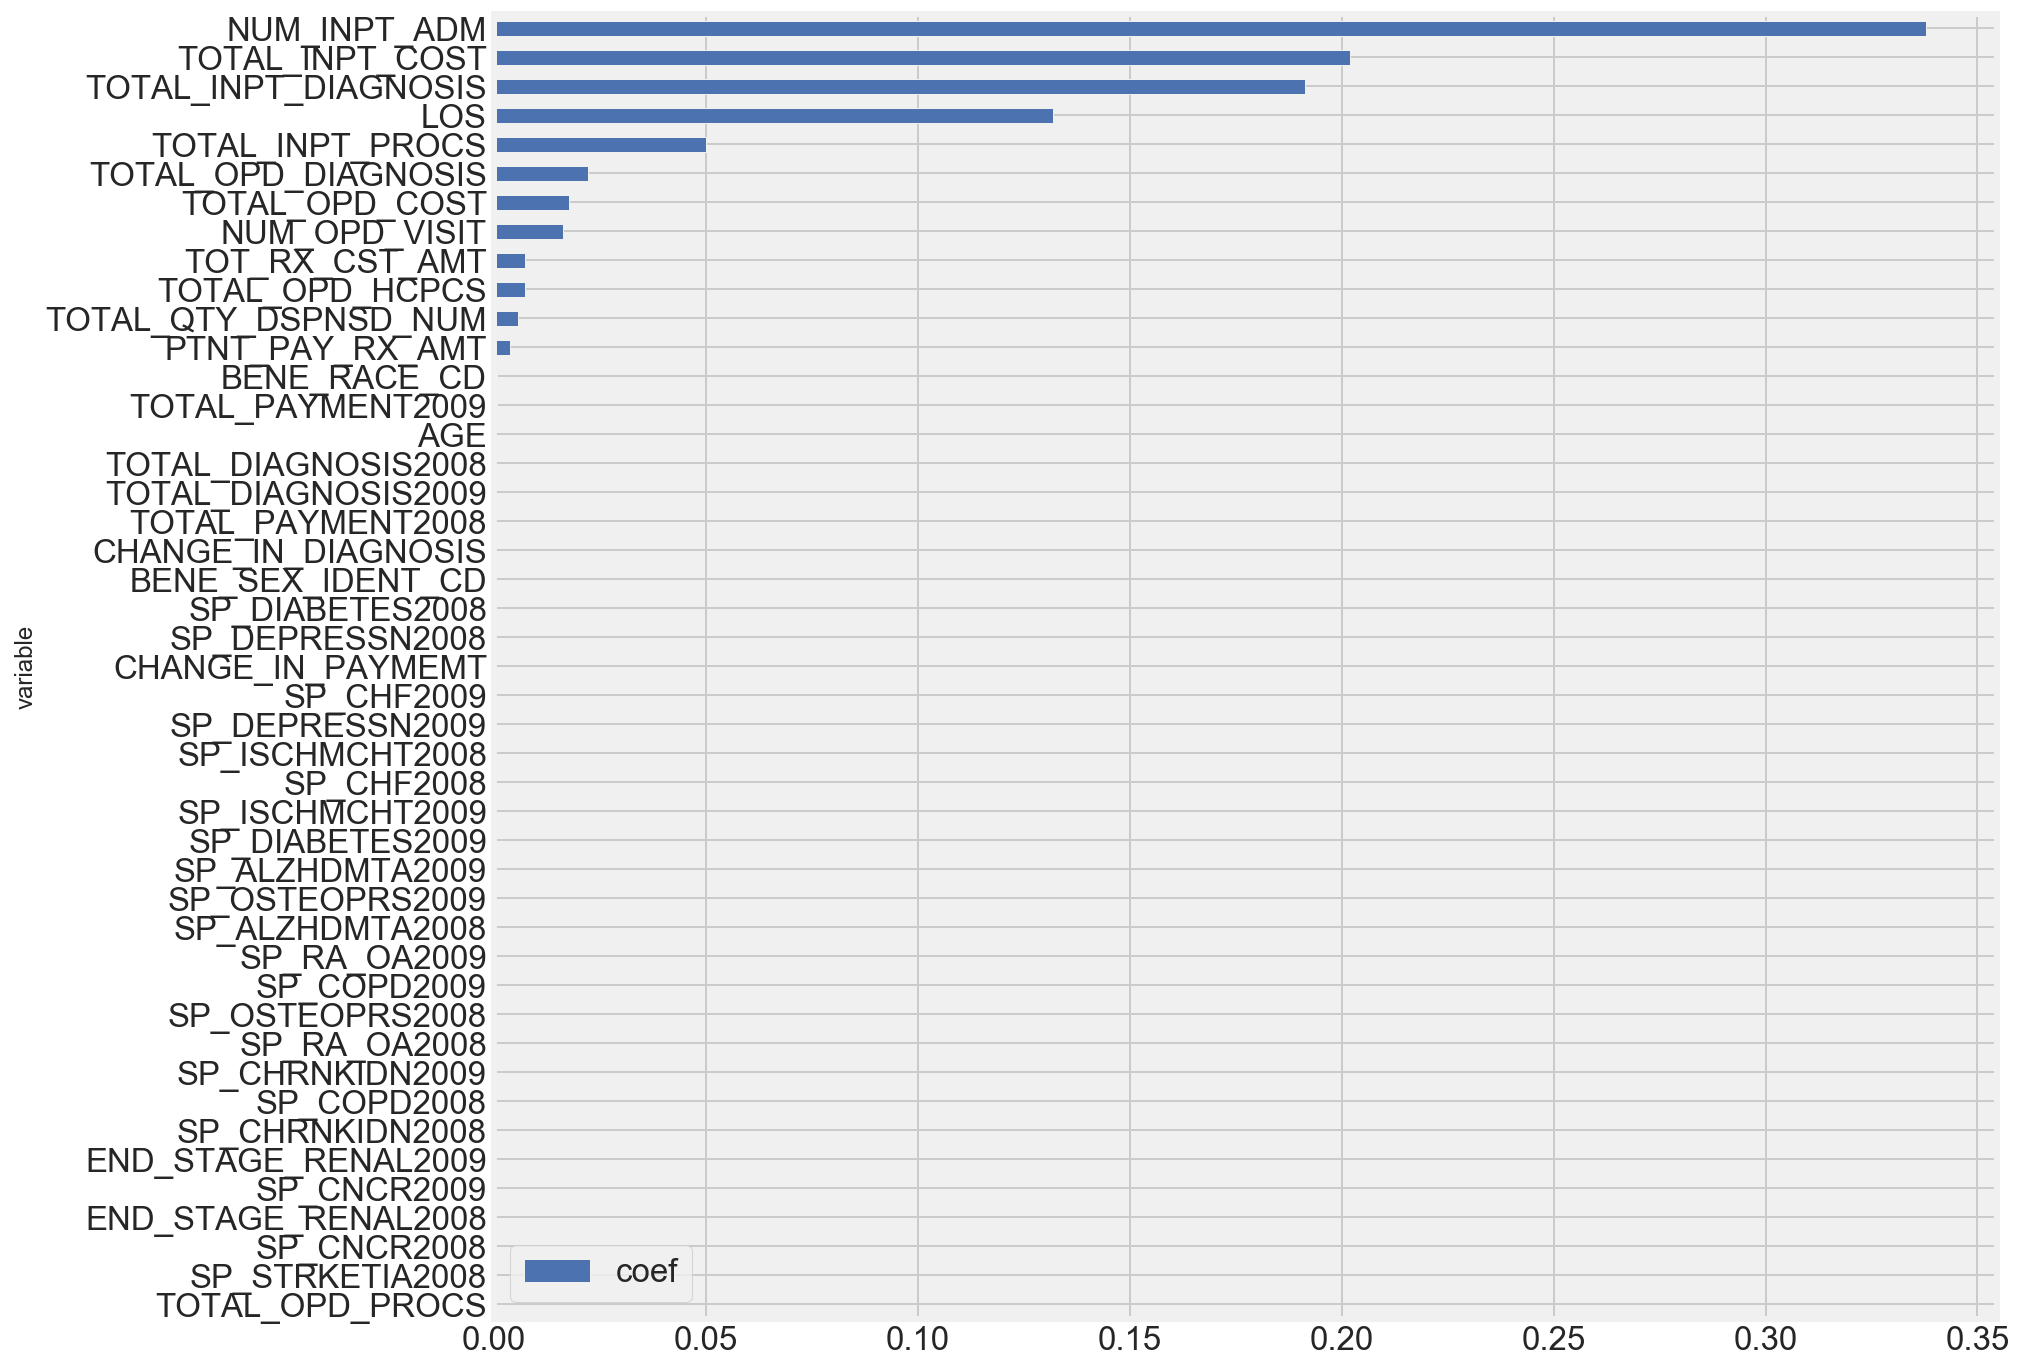

In [23]:
importance_RF_GS_DF.sort_values(by='abs_coef', ascending=True).plot(kind='barh',  y='coef', x='variable',
                      color='b', figsize=(12, 12))
plt.show()

In [31]:
predictions_RF_GS = modelRF_GS.best_estimator_.predict(X_test_pca)
predictions_RF_GS

array([1, 0, 0, ..., 0, 0, 1])

In [51]:
probabilities_RF_GS = modelRF_GS.best_estimator_.predict_proba(X_test_pca)
probabilities_RF_GS

array([[0.00000000e+00, 1.00000000e+00],
       [9.86791037e-01, 1.32089629e-02],
       [9.97663809e-01, 2.33619146e-03],
       ...,
       [9.97059301e-01, 2.94069938e-03],
       [9.99381839e-01, 6.18161339e-04],
       [0.00000000e+00, 1.00000000e+00]])

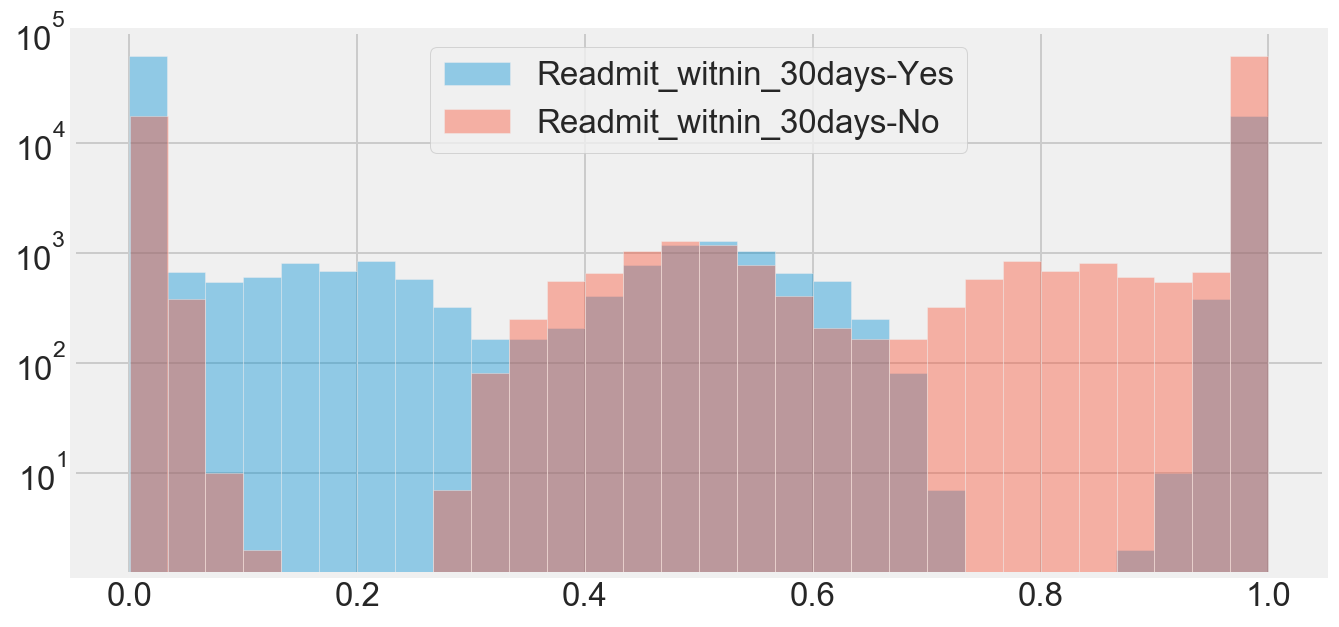

In [55]:
# Spread of class 1 and class 0

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(probabilities_RF_GS[:,0], bins=30, ax=ax, kde=False, label='Readmit_witnin_30days-Yes')
sns.distplot(probabilities_RF_GS[:,1], bins=30, ax=ax, kde=False, label='Readmit_witnin_30days-No')
ax.legend()
plt.yscale('log')
plt.show()

In [16]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_RF_GS, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

,Predicted_No_Readmissions,Predicted_Readmissions
True_No_Readmissions,19509,1223
True_Readmissions,2410,68524


In [17]:
print(classification_report(y_test, predictions_RF_GS))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     20732
           1       0.98      0.97      0.97     70934

    accuracy                           0.96     91666
   macro avg       0.94      0.95      0.94     91666
weighted avg       0.96      0.96      0.96     91666



In [18]:
def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

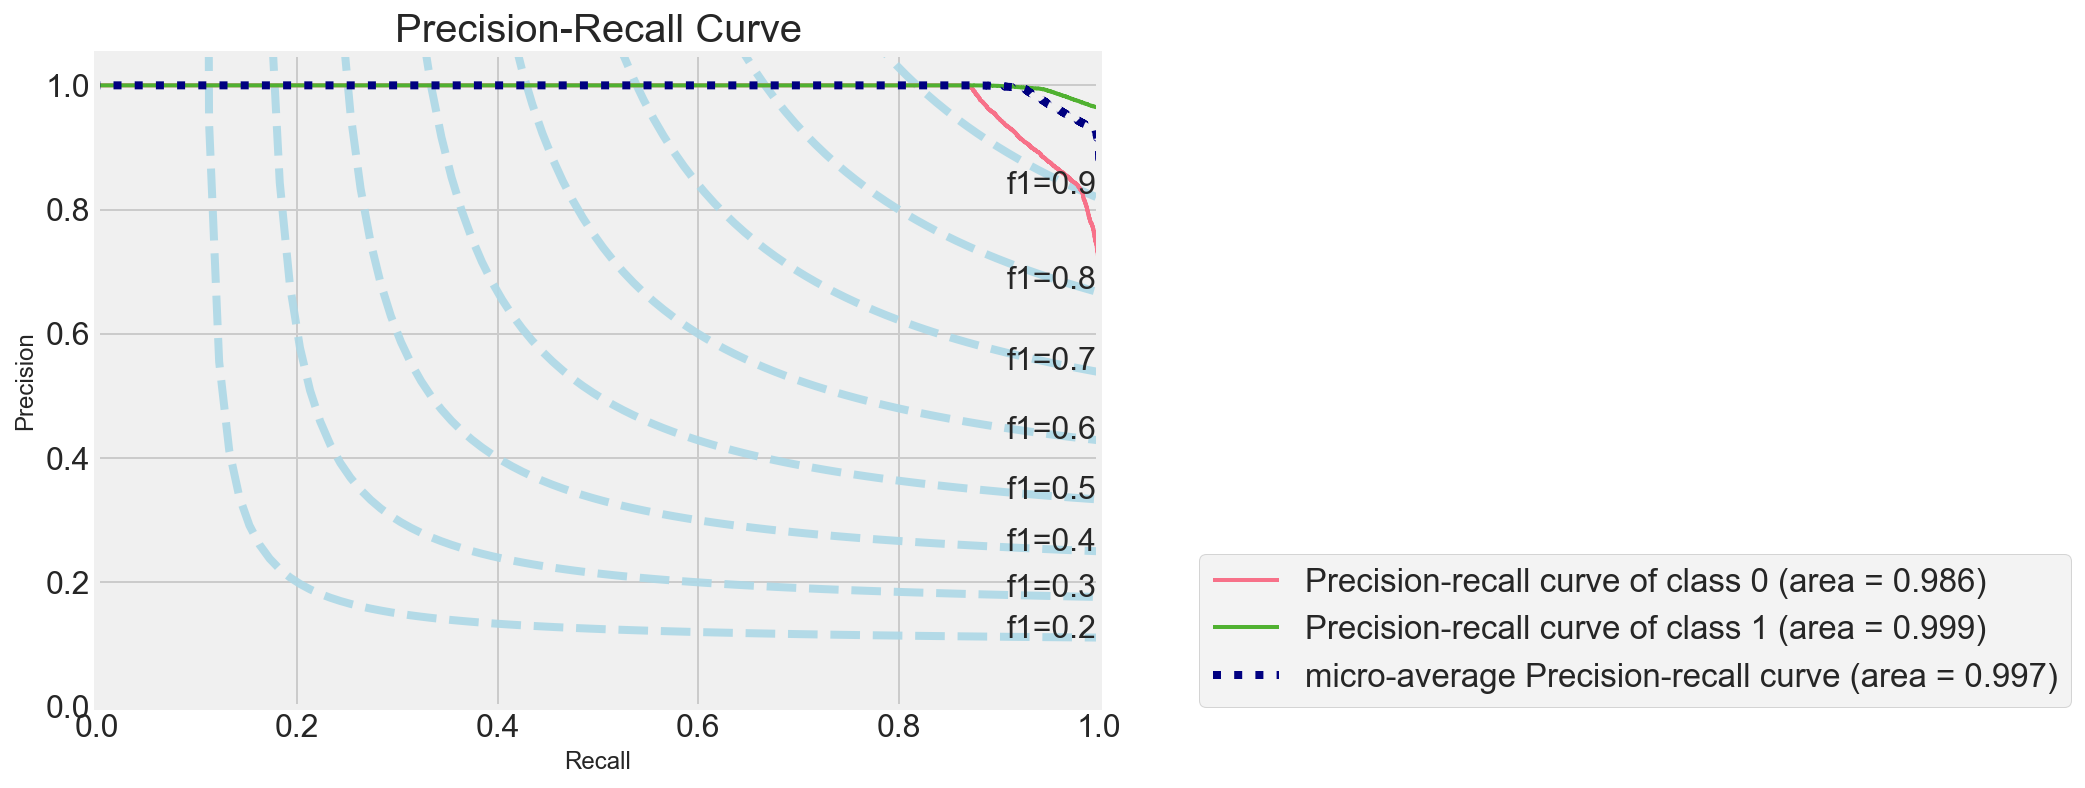

In [19]:
# Recall Precision plot

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, probabilities_RF_GS, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

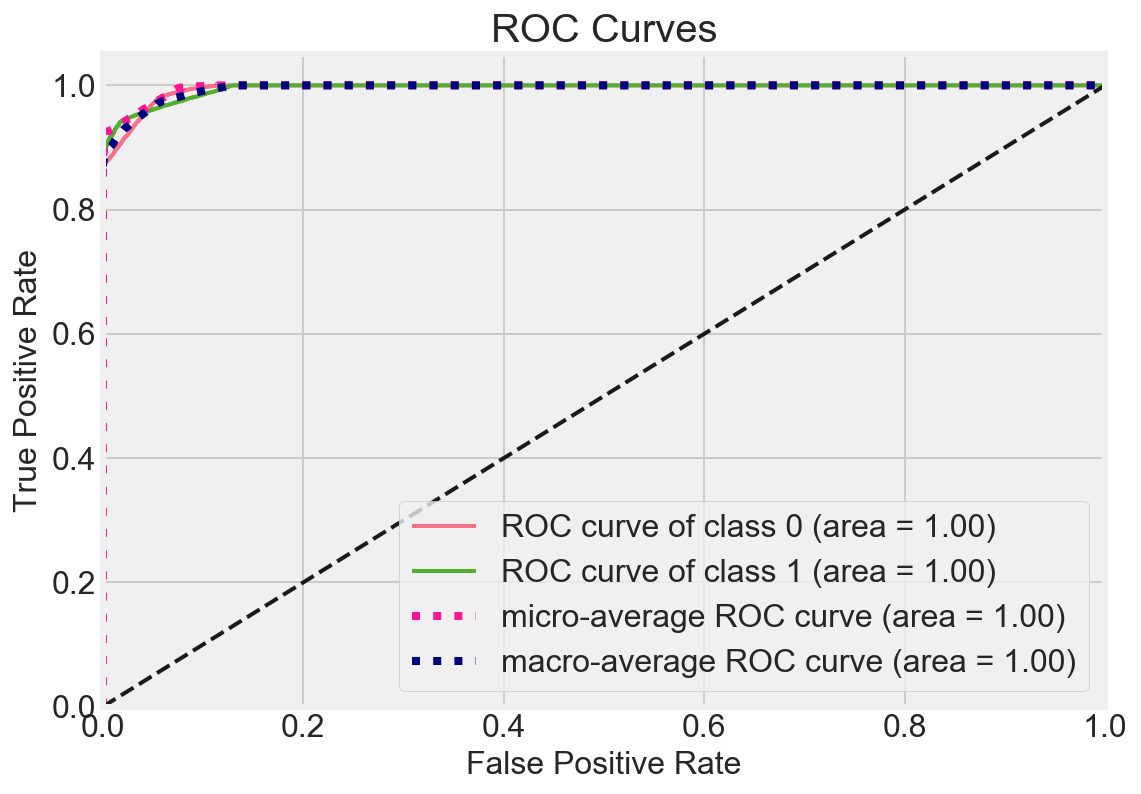

In [20]:
# ROC plot

skplt.metrics.plot_roc(y_test, probabilities_RF_GS, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

In [21]:
joblib.dump(modelRF_GS, 'modelRF_GS.jlib')

['modelRF_GS.jlib']

### Decison Tree GridSearch

In [25]:
DT_Classifier_params = {'max_depth': [2,4,6,8,10,12],      #list(range(1, 4))+[None], #'max_depth': [None, 1,2,3,4,5],#list(range(1, 11))
                        'criterion' :['gini', 'entropy'], 
                        'max_features': [None, 'auto'],
                        #'min_samples_split': [2,  10],      #, 25, 50], #[2, 5, 10, 20, 30, 50],
                        #'min_samples_leaf': [1, 4],                             # [1, 2, 3, 4]
                        #'class_weight':['balanced']   # already done SMOTE    #,'ccp_alpha': [0, 0.001, 0.005, 0.01]
                       }

classifier = DecisionTreeClassifier(random_state=1)

In [26]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

DT_Classifier_gridsearch = GridSearchCV(estimator=classifier,
                                         param_grid=DT_Classifier_params,
                                         cv=kf,
                                         scoring='accuracy',
                                         n_jobs=-1,     
                                         verbose=1, 
                                         refit=True
                                       )

DT_Classifier_gridsearch.fit(X_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   51.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': [None, 'auto']},
             scoring='accuracy', verbose=1)

In [27]:
print("Best score (Decision Tree GS): ", DT_Classifier_gridsearch.best_score_)
print("Best params (Decision Tree GS): ", DT_Classifier_gridsearch.best_params_)
print("Best estimator (Decision Tree GS): ", DT_Classifier_gridsearch.best_estimator_)

Best score (Decision Tree GS):  0.9736937635469717
Best params (Decision Tree GS):  {'criterion': 'gini', 'max_depth': 12, 'max_features': None}
Best estimator (Decision Tree GS):  DecisionTreeClassifier(max_depth=12, random_state=1)


In [28]:
test_score_DT_GS = DT_Classifier_gridsearch.best_estimator_.score(X_test_pca,y_test)

print('Decision Tree GS Score (Test): ', test_score_DT_GS)

Decision Tree GS Score (Test):  0.9657342962494273


In [29]:
importance_DT_GS = DT_Classifier_gridsearch.best_estimator_.feature_importances_
                  
importance_DT_GS_DF = pd.DataFrame({'variable': X_train_pca.columns,
                             'coef': importance_DT_GS,
                             'abs_coef': np.abs(importance_DT_GS), 
                            })
importance_DT_GS_DF.sort_values(by='abs_coef', ascending=False).head(12)

,variable,coef,abs_coef
35,TOTAL_INPT_DIAGNOSIS,0.823346,0.823346
33,NUM_INPT_ADM,0.170015,0.170015
26,TOTAL_DIAGNOSIS2009,0.002005,0.002005
34,TOTAL_INPT_COST,0.001925,0.001925
1,BENE_RACE_CD,0.000482,0.000482
36,TOTAL_INPT_PROCS,0.000431,0.000431
32,LOS,0.000259,0.000259
43,PTNT_PAY_RX_AMT,0.000152,0.000152
30,CHANGE_IN_DIAGNOSIS,0.000149,0.000149
27,TOTAL_PAYMENT2008,0.000139,0.000139


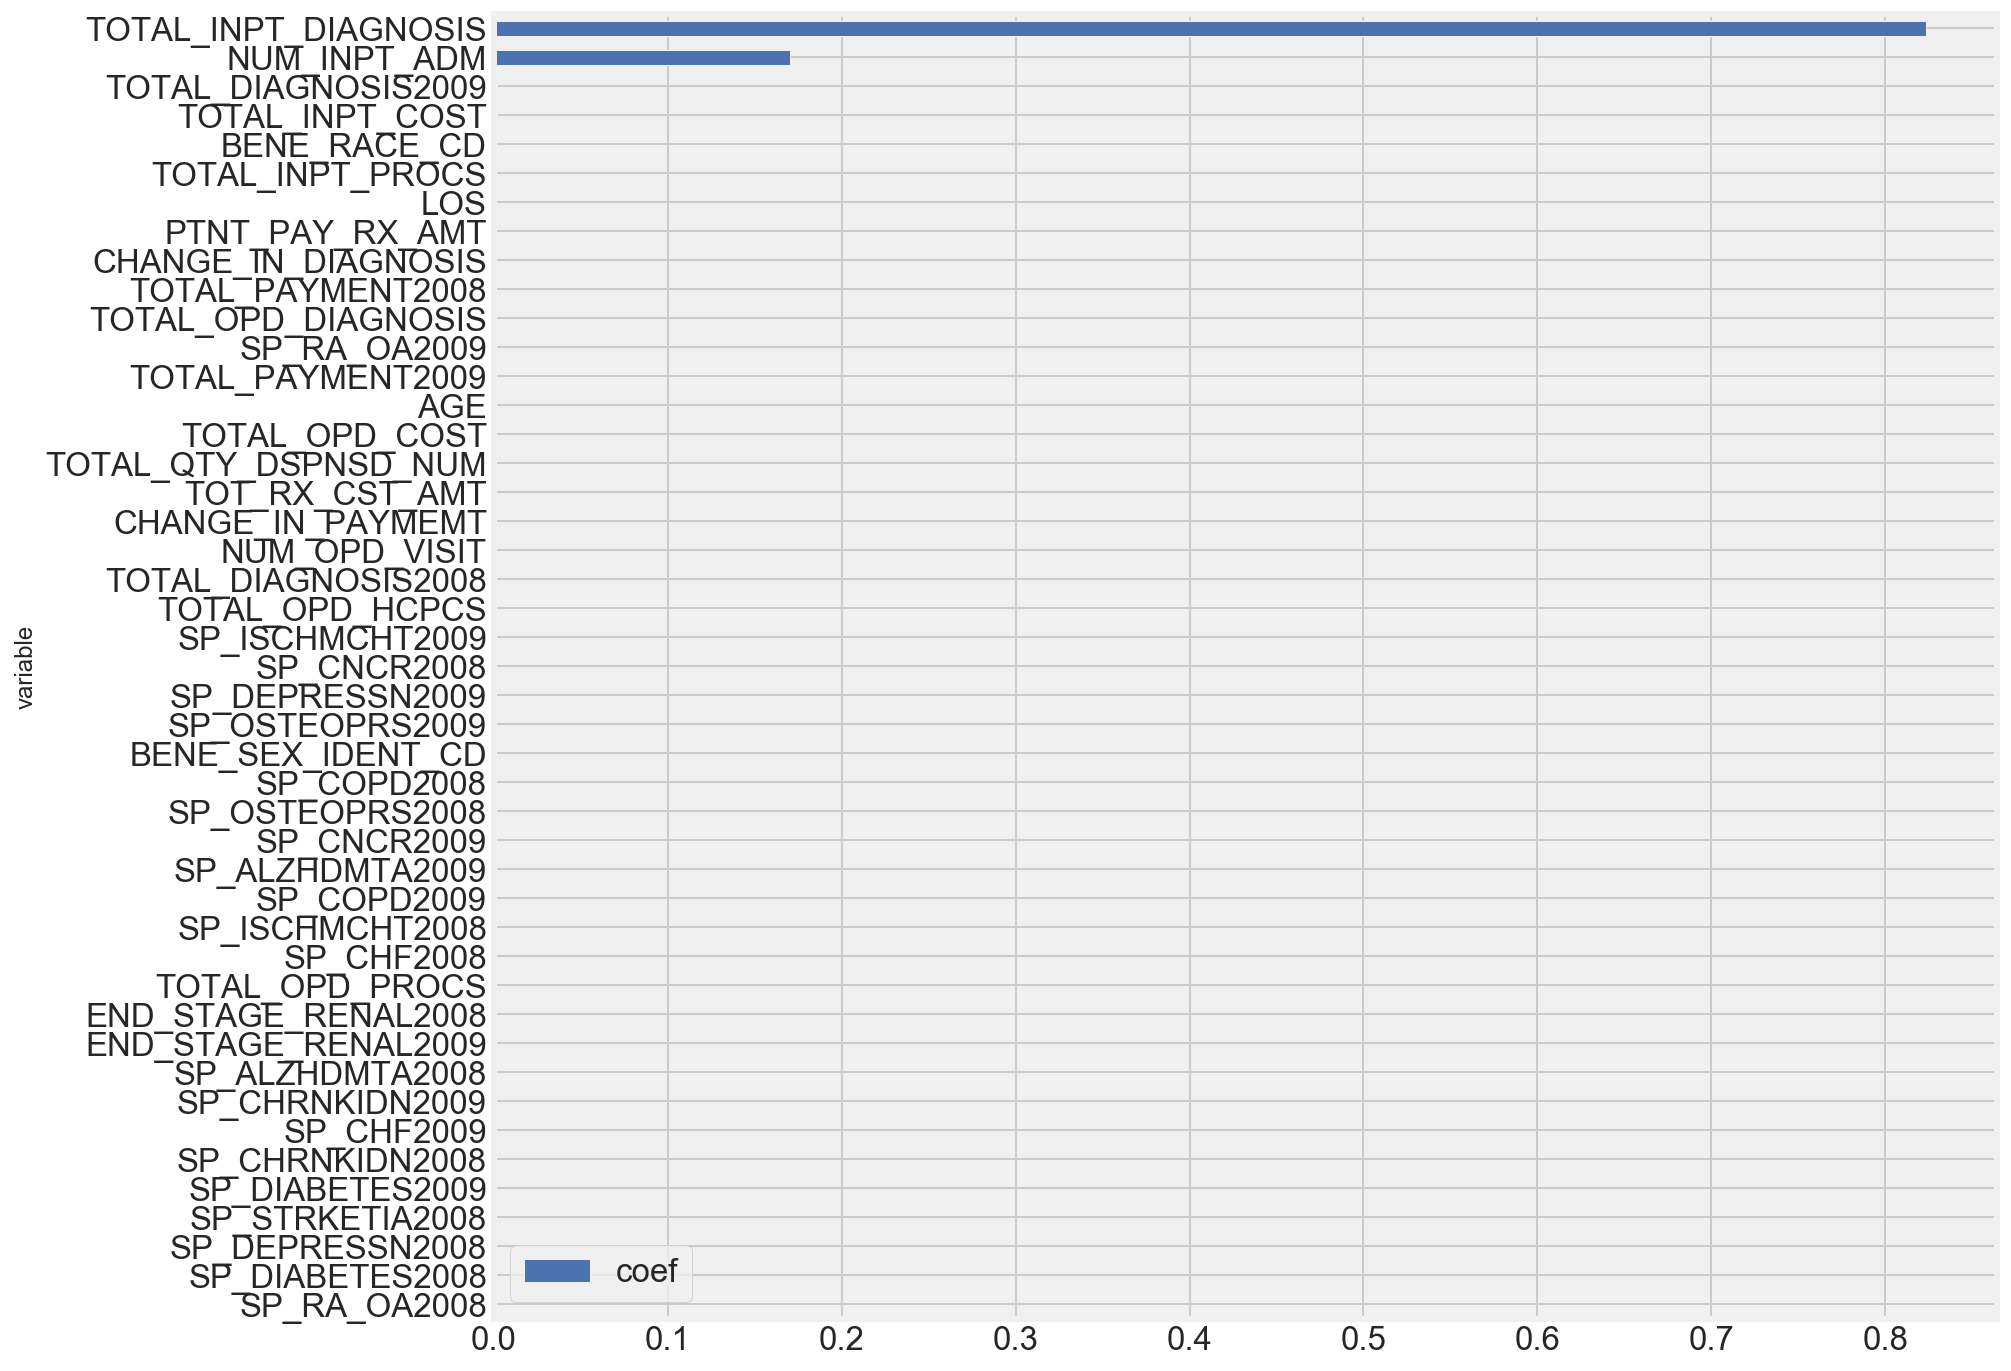

In [30]:
importance_DT_GS_DF.sort_values(by='abs_coef', ascending=True).plot(kind='barh',  y='coef', x='variable',
                      color='b', figsize=(12, 12))
plt.show()

In [31]:
# Predictons and Probabilities 
predictions_DT_GS = DT_Classifier_gridsearch.best_estimator_.predict(X_test_pca) 
#predictions_DT 
probabilities_DT_GS = DT_Classifier_gridsearch.best_estimator_.predict_proba(X_test_pca) 
#probabilities_DT

In [32]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_DT_GS, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])


,Predicted_No_Readmissions,Predicted_Readmissions
True_No_Readmissions,18638,2094
True_Readmissions,1047,69887


In [33]:
print(classification_report(y_test, predictions_DT_GS))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     20732
           1       0.97      0.99      0.98     70934

    accuracy                           0.97     91666
   macro avg       0.96      0.94      0.95     91666
weighted avg       0.97      0.97      0.97     91666



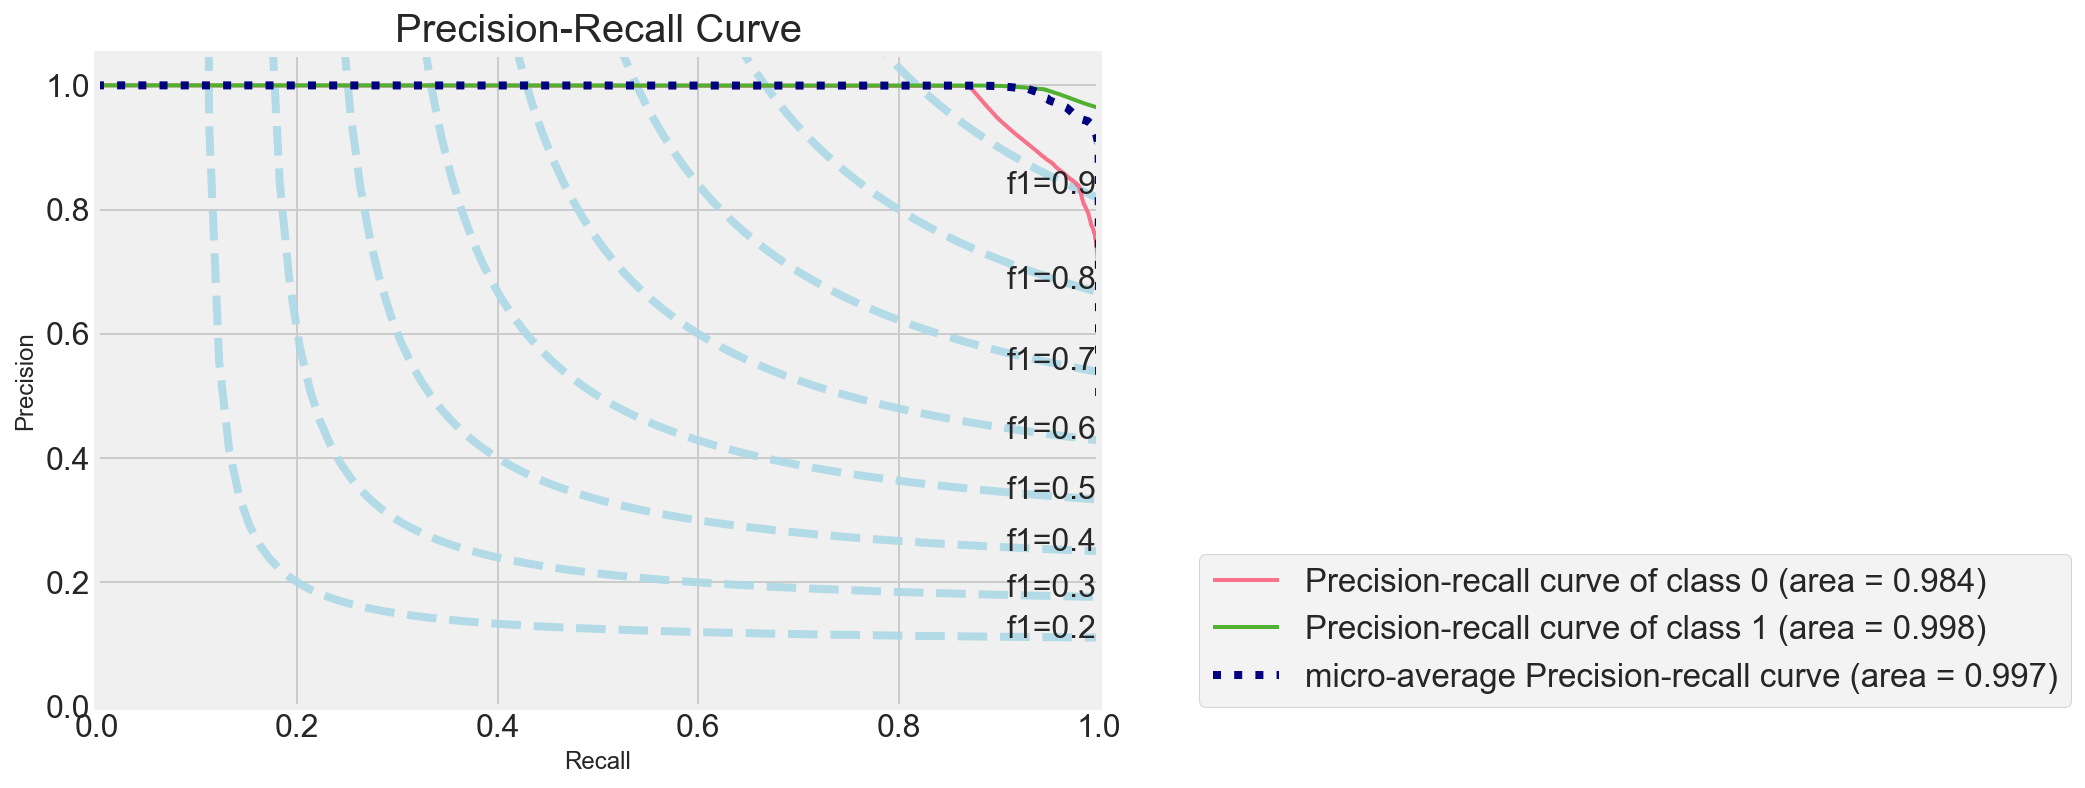

In [34]:
# Recall Precision plot

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, probabilities_DT_GS, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

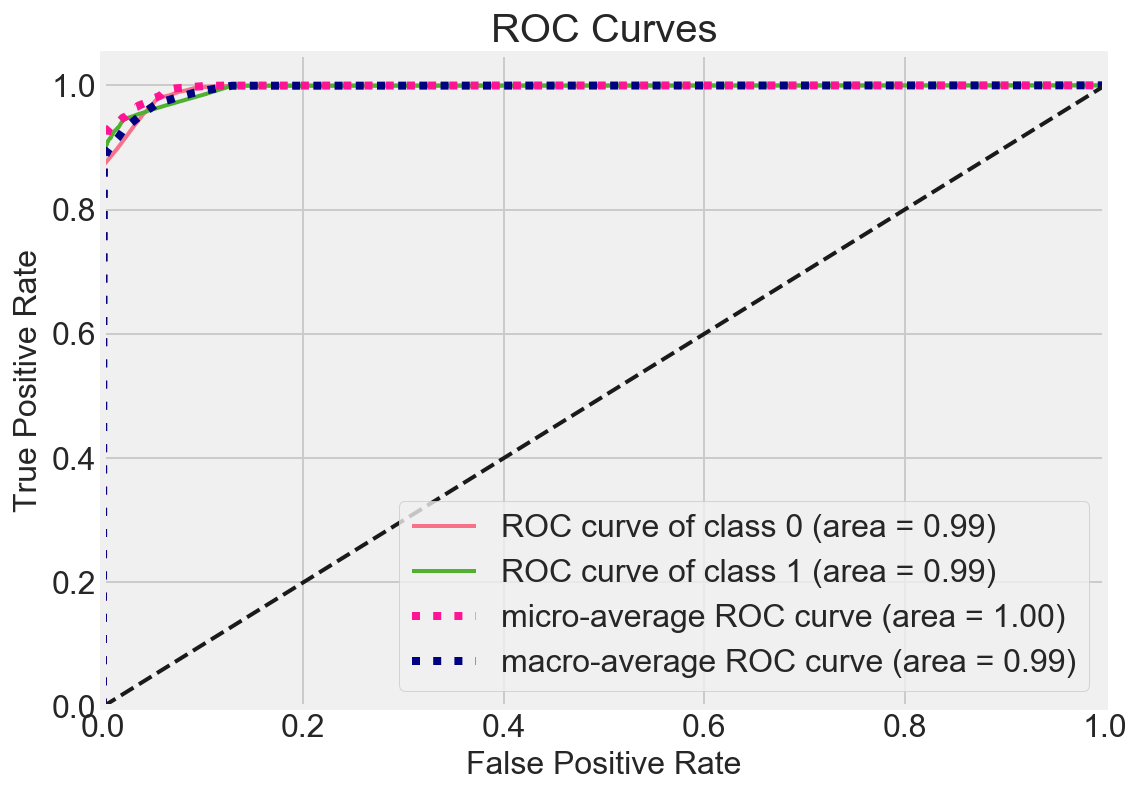

In [35]:
# ROC plot

skplt.metrics.plot_roc(y_test, probabilities_DT_GS, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

In [36]:
joblib.dump(DT_Classifier_gridsearch, 'DT_Classifier_gridsearch.jlib')

['DT_Classifier_gridsearch.jlib']

### KNN GridSearch

In [94]:
gs_knn_params = {
                'n_neighbors': [5, 10],             #  25, 50], #[5, 15, 25, 35, 40, 45, 50, 60, 75],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
                }

model_KNN = KNeighborsClassifier()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
knn_gridsearch = GridSearchCV(estimator=model_KNN,
                             param_grid=gs_knn_params,
                             cv=kf,
                             scoring='accuracy',
                             n_jobs=-1,                                      # runs on 3 cores
                             verbose=1)                                      # return_train_score=True
knn_gridsearch.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
datetime.now()

In [ ]:
# Printing parameters

print('Best Paramaters (KNN): ', knn_gridsearch.best_params_)
print('Best Score (KNN): ', knn_gridsearch.best_score_)
print('Best KNN ' , knn_gridsearch.best_estimator_)

In [ ]:
datetime.now()

In [ ]:
print('Test Score: ', knn_gridsearch.best_estimator_.score(X_test_pca,y_test))

In [ ]:
datetime.now()

In [ ]:
predictions_KNN = knn_gridsearch.best_estimator_.predict(X_test_pca)
#predictions_KNN

probabilities_KNN = knn_gridsearch.best_estimator_.predict_proba(X_test_pca)
#probabilities_KNN

In [ ]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_KNN, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

In [ ]:
print(classification_report(y_test, predictions_KNN))

In [ ]:
datetime.now()

In [ ]:
joblib.dump(knn_gridsearch, 'knn_gridsearch.jlib')

### SVM Gridsearch

In [16]:
gs_SVM_params = {#'gamma': np.linspace(0.01, 2, 2),  #np.linspace(0.01, 2, 10),
                #'kernel': ['rbf'],#,'linear', 'poly'],#, 'rbf', 'sigmoid'],  # , 'precomputed'
                'C': np.logspace(-2, 2, 2),
                'penalty' : ['l1', 'l2'] }   

#modelSVM_GS = SVC()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

SVM_gridsearch = GridSearchCV(estimator=modelSVM_base,
                             param_grid=gs_SVM_params,
                             cv=kf,
                             #scoring='accuracy',
                             n_jobs=3,     # runs on 3 cores
                             verbose=1,
                             error_score = 0.0)


SVM_gridsearch.fit(X_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed: 17.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=0.0, estimator=LinearSVC(), n_jobs=3,
             param_grid={'C': array([1.e-02, 1.e+02]), 'penalty': ['l1', 'l2']},
             verbose=1)

In [ ]:
datetime.now()

In [17]:
print('Best Paramaters (SVM): ', SVM_gridsearch.best_params_)
print('Best Score (SVM): ', SVM_gridsearch.best_score_)
print('Best SVM: ' , SVM_gridsearch.best_estimator_)

Best Paramaters (SVM):  {'C': 0.01, 'penalty': 'l2'}
Best Score (SVM):  0.8308597811338044
Best SVM:  LinearSVC(C=0.01)


In [18]:
datetime.now()

datetime.datetime(2020, 5, 20, 11, 3, 36, 596452)

In [19]:
SVM_gridsearch_score = SVM_gridsearch.best_estimator_.score(X_test_pca,y_test)

print('Test Score: ' , SVM_gridsearch_score)

Test Score:  0.8345187965003382


In [12]:
predictions_svm_GS = SVM_gridsearch.best_estimator_.predict(X_test_pca)
print(classification_report(y_test, predictions_svm_GS))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69     20732
           1       0.93      0.85      0.89     70934

    accuracy                           0.83     91666
   macro avg       0.77      0.82      0.79     91666
weighted avg       0.86      0.83      0.84     91666



In [20]:
joblib.dump(SVM_gridsearch, 'SVM_gridsearch.jlib')

['SVM_gridsearch.jlib']